In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data = pd.DataFrame(housing.data)

In [9]:
data.shape

(20640, 8)

In [13]:
data.columns = (housing.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
data['PRICE'] = housing.target

In [15]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [17]:
x = data.drop(['PRICE'],axis = 1)
y = data['PRICE']

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
import sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [22]:
lm.intercept_


-36.85856910680128

In [23]:
lm.coef_

array([ 4.33333407e-01,  9.29324337e-03, -9.86433739e-02,  5.93215487e-01,
       -7.56192502e-06, -4.74516383e-03, -4.21449336e-01, -4.34166041e-01])

In [24]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [27]:
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)

In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest,ytest_pred)
print(mse)
mse = mean_squared_error(ytrain,ytrain_pred)
print(mse)

0.5289841670367209
0.5234413607125448


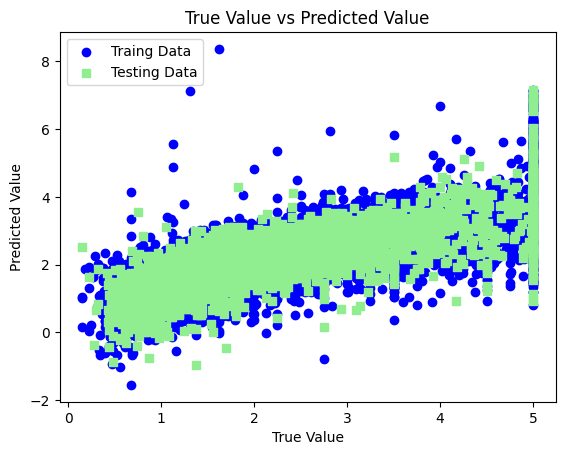

In [36]:
plt.scatter(ytrain,ytrain_pred,c='blue',marker='o',label='Traing Data')
plt.scatter(ytest,ytest_pred,c='lightgreen',marker='s',label='Testing Data')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True Value vs Predicted Value')
plt.legend(loc='upper left')
plt.plot()
plt.show()